<a href="https://colab.research.google.com/github/rayane2907/Machine_learning/blob/main/PCA_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## *Understanding the difference between PCA and Kernel based PCA*

*   *Done by:* AMMAR KHODJA Rayane.




Text(0.5, 0, 'x coordinate')

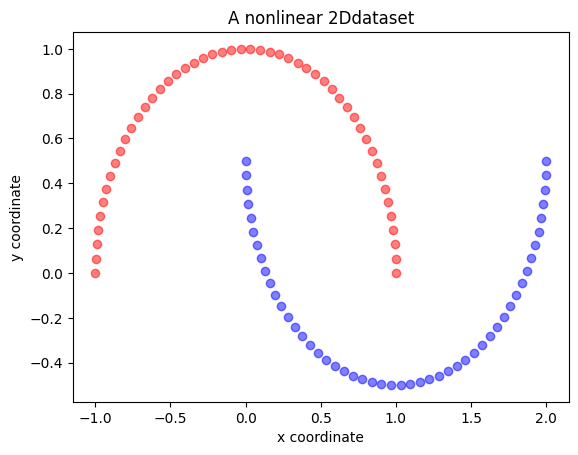

In [ ]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=123)

plt.scatter(X[y==0, 0], X[y==0, 1], color='red', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)

plt.title('A nonlinear 2Ddataset')
plt.ylabel('y coordinate')
plt.xlabel('x coordinate')



*   Computing the covariance matrix:



In [ ]:
import numpy as np
# Standarizing
X_stdz = (X - X.mean(axis = 0)) / X.std(axis = 0)
#Covariance matrix
covariance_matrix = np.cov(X_stdz, rowvar=False)

print("Covariance Matrix:")
print(covariance_matrix)

Covariance Matrix:
[[ 1.01010101 -0.44128144]
 [-0.44128144  1.01010101]]




*   Computing the eigen vectors and the eigen values:



In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
print("eigenvalues:")
print(eigenvalues)
print("eigenvectors:")
print(eigenvectors)

eigenvalues:
[1.45138245 0.56881957]
eigenvectors:
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


In [ ]:
# This function returns the indices that would sort the array eigenvalues in ascending order
# then, we use it to sort the indices in descending order, indicating the order of importance.
ord_imp = np.argsort(eigenvalues)[::-1]
#This line uses the sorted order (ord_imp) to rearrange the eigenvalues in descending order of importance.
sorted_eigenvalues = eigenvalues[ord_imp]
#The result now represents the eigenvectors corresponding to the sorted eigenvalues
sorted_eigenvectors = eigenvectors[:, ord_imp]
# Clculating the variance
variance = sorted_eigenvalues / np.sum(sorted_eigenvalues)
print("ord_imp is:")
print(ord_imp)
print("sorted_eigenvalues are:")
print(sorted_eigenvalues)
print("sorted_eigenvectors are")
print(sorted_eigenvectors)
print("the variance that need to be explained is:")
print(variance)

ord_imp is:
[0 1]
sorted_eigenvalues are:
[1.45138245 0.56881957]
sorted_eigenvectors are
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
the variance that need to be explained is:
[0.71843431 0.28156569]




*   Degging deeper into the algorithm




Top 2 Principal Components:
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]

Variance Ratio: 1.0


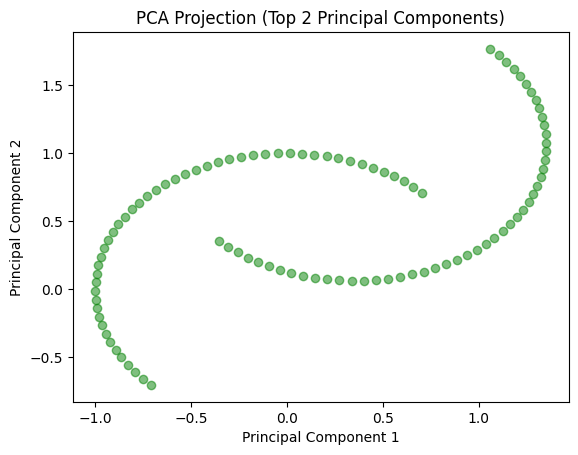

In [ ]:
# Choose the number of principal components (k) we want to retain
# For example, let's say we want to keep the top 2 principal components
k = 2

# Select the top k eigenvectors and eigenvalues
top_k_eigenvectors = sorted_eigenvectors[:, :k]
top_k_eigenvalues = sorted_eigenvalues[:k]

# Project the data onto the selected principal components
# This is the dimensionality reduction step
projected_data = X.dot(top_k_eigenvectors)

# The amount of variance explained by the selected principal components
variance_ratio = np.sum(top_k_eigenvalues) / np.sum(sorted_eigenvalues)

# Print the results
print(f"Top {k} Principal Components:")
print(top_k_eigenvectors)
print("\nVariance Ratio:", variance_ratio)

# Plot the projected data
plt.scatter(projected_data[:, 0], projected_data[:, 1], color='green', alpha=0.5)
plt.title(f'PCA Projection (Top {k} Principal Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

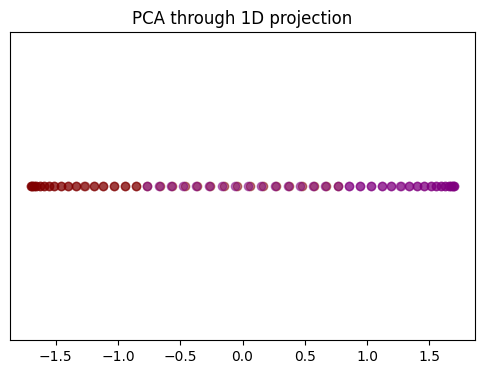

In [ ]:
eigen_compositons = [(np.abs(eigenvalues[i]), eigenvectors[:, i]) for i in range(len(eigenvalues))]
eigen_compositons.sort(key=lambda k: k[0], reverse=True)
# Step 5: Construct the projection matrix W (taking only the top eigenvalue)
W = eigen_compositons[0][1].reshape(X.shape[1], 1)

# Step 6: Transform the original dataset
X_pca = X_stdz.dot(W)

# Plotting the transformed points
plt.figure(figsize=(6, 4))
plt.scatter(X_pca[y == 0], np.zeros((len(X_pca[y == 0]), 1)), color='maroon', alpha=0.5)
plt.scatter(X_pca[y == 1], np.zeros((len(X_pca[y == 1]), 1)), color='purple', alpha=0.5)
plt.title('PCA through 1D projection')
plt.yticks([])
plt.show()

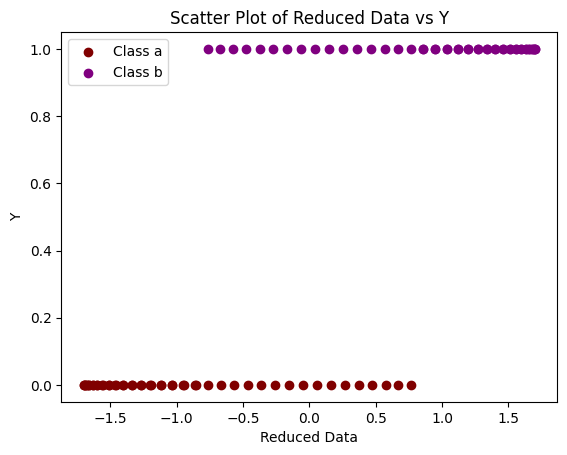

In [ ]:
#separate the x from y
# Plotting points for y == 0 in red color
plt.scatter(X_pca[y == 0], y[y == 0], color='maroon', label='Class a')

# Plotting points for y == 1 in blue color
plt.scatter(X_pca[y == 1], y[y == 1], color='purple', label='Class b')
# Set labels and title
plt.xlabel('Reduced Data')
plt.ylabel('Y')
plt.title('Scatter Plot of Reduced Data vs Y')

# Show legend
plt.legend()

# Show plot
plt.show()


*   Doing the separation using the *preceptron Algorithm*




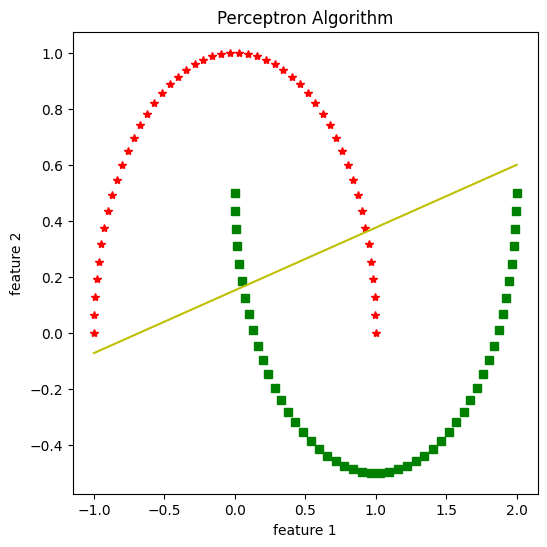

In [ ]:
# defining the step function
def step_func(z):
        return 1.0 if (z > 0) else 0.0

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def perceptron(X, y, lr, epochs):                 # lr is the learning rate

    # m-> number of training examples
    # n-> number of features
    m, n = X.shape
    theta = np.zeros((n+1,1)) # 1 in n+1 because of the bias at w0
    n_miss_list = []
    for epoch in range(epochs):
        n_miss = 0                 #misclassified variable to store
        for idx, x_i in enumerate(X):
            # Insering 1 for bias, X0 = 1.
            x_i = np.insert(x_i, 0, 1).reshape(-1,1)
            # Calculating prediction/hypothesis.
            y_hat = sigmoid(np.dot(x_i.T, theta))
            # Updating if the chosen example is misclassified.
            if (np.squeeze(y_hat) - y[idx]) != 0:
                theta += lr*((y[idx] - y_hat)*x_i)
                n_miss += 1
        n_miss_list.append(n_miss)
    return theta, n_miss_list

def plot_decision_boundary(X, theta):

    # The Line is y=mx+c. So, Equate mx+c = theta0.X0 + theta1.X1 + theta2.X2
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -theta[1]/theta[2]
    c = -theta[0]/theta[2]
    x2 = m*x1 + c

    # Plotting
    fig = plt.figure(figsize=(6,6))
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "r*")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "gs")
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title('Perceptron Algorithm')
    plt.plot(x1, x2, 'y-')

    #the result of segmoid function
theta, miss_l = perceptron(X, y, 0.1, 100)
plot_decision_boundary(X, theta)

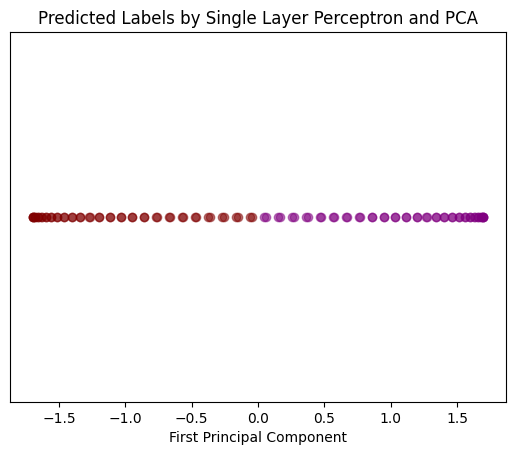

In [ ]:
lr = 0.01
n_iters = 1000

n_samples, n_features = X_pca.shape
w = np.zeros(n_features)
b = 0

def activation_func( x):
  return 1 / (1 + np.exp(-x))

def predict( X):
  linear_output = np.dot(X, w) + b
  return activation_func(linear_output)


y_ = np.array([1 if i > 0 else 0 for i in y])

for _ in range(n_iters):
    for idx, x_i in enumerate(X_pca):
      linear_output = np.dot(x_i, w) + b
      y_predicted = activation_func(linear_output)
      # Update rule
      update = lr * (y_[idx] - y_predicted)
      w += update * x_i
      b += update

# Predictions
predictions = predict(X_pca)

# Convert predictions to binary outcomes
predictions = np.where(predictions >= 0.5, 1, 0)
plt.scatter(X_pca[predictions == 0], np.zeros((len(X_pca[y == 0]), 1)), color='maroon', alpha=0.5)
plt.scatter(X_pca[predictions == 1], np.zeros((len(X_pca[y == 1]), 1)), color='purple', alpha=0.5)
plt.title("Predicted Labels by Single Layer Perceptron and PCA")
plt.xlabel("First Principal Component")
plt.yticks([])

plt.show()

## Implementing the Kernel based PCA (KPCA)

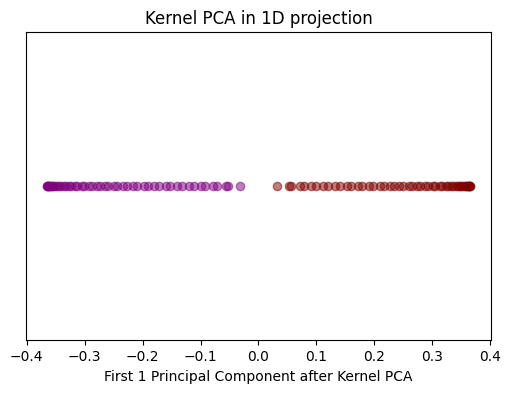

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def compute_squared_euclidean_distance(X):
    n_samples = X.shape[0]
    sq_dists = np.zeros((n_samples, n_samples))

    for i in range(n_samples):
        for j in range(n_samples):
            sq_dists[i, j] = np.sum((X[i, :] - X[j, :]) ** 2)

    return sq_dists

def rbf_kernel_pca(X, gamma, n_components):
    # Convert pairwise distances into a square matrix.
    mat_sq_dists = compute_squared_euclidean_distance(X)

    # Compute the symmetric kernel matrix.
    K = np.exp(-gamma * mat_sq_dists)

    # Center the kernel matrix.
    N = K.shape[0]
    one_n = np.ones((N, N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

    # Obtaining eigenpairs from the centered kernel matrix
    eigvals, eigvecs = np.linalg.eigh(K)
    eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1]

    # Collect the top k eigenvectors (projected samples)
    X_pc = eigvecs[:, :n_components]

    # Normalize the eigenvectors by eigenvalues
    # This step is crucial for some versions of the algorithm
    alphas = np.column_stack([eigvecs[:, i] / np.sqrt(eigvals[i]) for i in range(n_components)])

    # The projection of the data into the new feature space
    X_kpca = K.dot(alphas)

    return X_kpca

# Assuming you have your dataset X and labels y
# Applying RBF kernel PCA
gamma = 15
n_components = 1
X_kpca = rbf_kernel_pca(X, gamma=gamma, n_components=n_components)

# Plotting the result
plt.figure(figsize=(6, 4))
plt.scatter(X_kpca[y == 0], np.zeros((np.sum(y == 0), 1)), color='maroon', alpha=0.5)
plt.scatter(X_kpca[y == 1], np.zeros((np.sum(y == 1), 1)), color='purple', alpha=0.5)
plt.title('Kernel PCA in 1D projection')
plt.xlabel(f'First {n_components} Principal Component after Kernel PCA')
plt.yticks([])
plt.show()

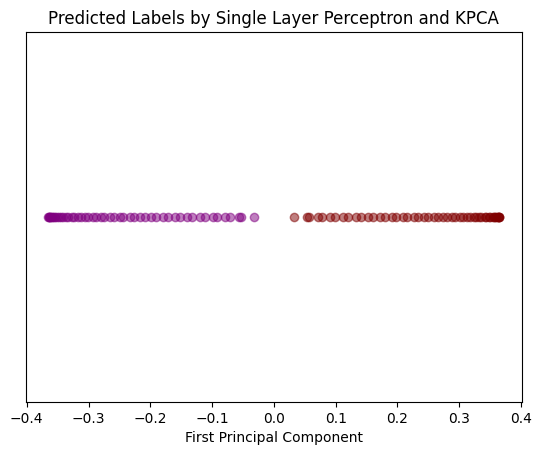

In [ ]:
lr = 0.01
n_iters = 1000

n_samples, n_features = X_kpca.shape
w = np.zeros(n_features)
b = 0

def activation_func( x):
  return 1 / (1 + np.exp(-x))

def predict( X):
  linear_output = np.dot(X, w) + b
  return activation_func(linear_output)


y_ = np.array([1 if i > 0 else 0 for i in y])

for _ in range(n_iters):
    for idx, x_i in enumerate(X_kpca):
      linear_output = np.dot(x_i, w) + b
      y_predicted = activation_func(linear_output)
      # Update rule
      update = lr * (y_[idx] - y_predicted)
      w += update * x_i
      b += update

# Predictions
predictions = predict(X_kpca)

# Convert predictions to binary outcomes
predictions = np.where(predictions >= 0.5, 1, 0)
plt.scatter(X_kpca[predictions == 0], np.zeros((len(X_kpca[y == 0]), 1)), color='maroon', alpha=0.5)
plt.scatter(X_kpca[predictions == 1], np.zeros((len(X_kpca[y == 1]), 1)), color='purple', alpha=0.5)
plt.title("Predicted Labels by Single Layer Perceptron and KPCA")
plt.xlabel("First Principal Component")
plt.yticks([])

plt.show()